In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.random.seed(0)
import pandas as pd
from sklearn.model_selection import train_test_split
#from lift_curves import lift_plot_old
import matplotlib.pyplot as plt
%matplotlib inline
from lift_curves import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
#skin dataset - 3 features and 1 target
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
skin_data_raw = pd.read_csv(url,sep='\t',names=['x1','x2','x3','target'])

In [3]:
print(skin_data_raw['target'].unique())
skin_data_raw['target']=skin_data_raw['target'].map({1:0,2:1})
skin_data_raw.head()

[1 2]


,x1,x2,x3,target
0,74,85,123,0
1,73,84,122,0
2,72,83,121,0
3,70,81,119,0
4,70,81,119,0


In [4]:
skin_data_raw['target'].unique()

array([0, 1], dtype=int64)

In [5]:
skin_data_raw.groupby('target').size()

target
0     50859
1    194198
dtype: int64

In [6]:
X = skin_data_raw.values[:,:3]
y = skin_data_raw.values[:,3]

In [7]:
#X_test,y_test used for final model evaluation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [8]:
#Random Forest
rf = RandomForestClassifier(n_estimators=10,max_depth=3)
rf.fit(X_train,y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

In [9]:
#lift_curve(y_test,y_pred_proba)

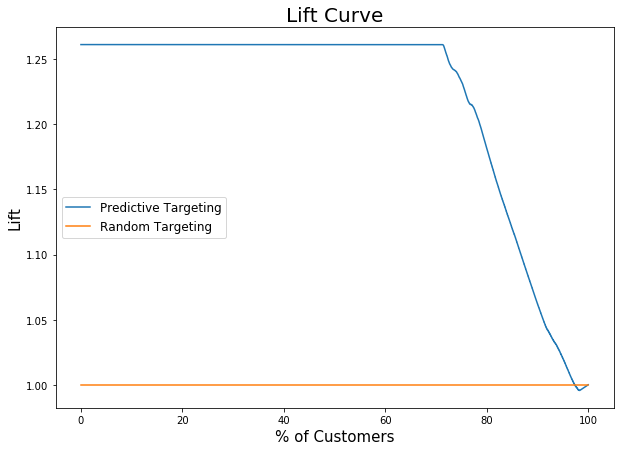

In [71]:
lift_curve(y_test,y_pred_proba,figsize=(10,7))
plt.show()

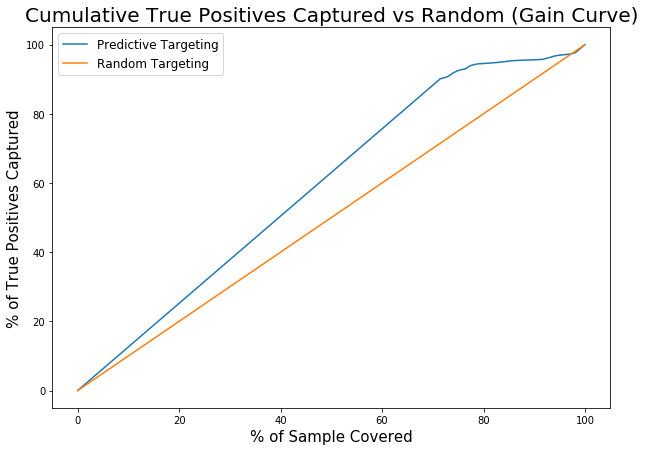

In [79]:
gain_curve(y_test,y_pred_proba,figsize=(10,7))
plt.show()

In [25]:
x, lift_rf = lift_values_generator(y_test,y_pred_proba)

In [26]:
#Linear Probability Model
lp = LinearRegression()
lp.fit(X_train,y_train)
#y_pred_proba = lp.predict_proba(X_test)[:, 1]
y_pred_proba = lp.predict(X_test)
y_pred = [1 if x >=0.5 else 0 for x in y_pred_proba]

In [27]:
x, lift_lp = lift_values_generator(y_test,y_pred_proba)

In [28]:
#Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred = lr.predict(X_test)

In [29]:
x, lift_lr = lift_values_generator(y_test,y_pred_proba)

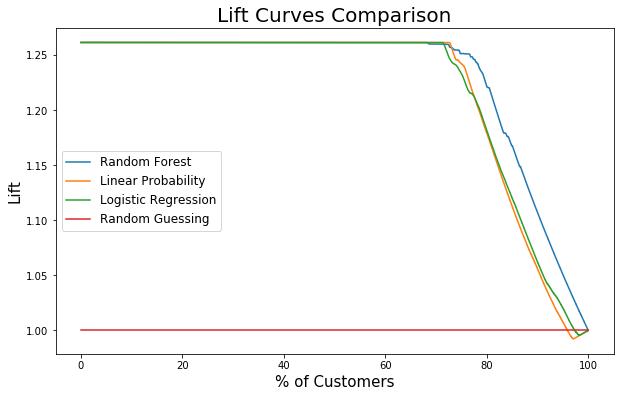

In [55]:
plot_lift_curves(x,
                 [lift_rf,lift_lp,lift_lr],
                 ['Random Forest','Linear Probability','Logistic Regression'],
                 figsize=(10,6))

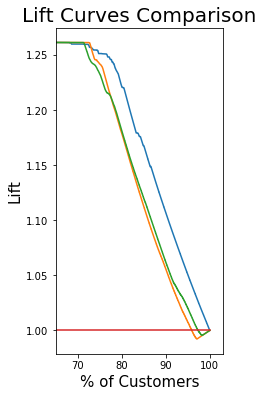

In [62]:
plot_lift_curves(x,
                 [lift_rf,lift_lp,lift_lr],
                 ['Random Forest','Linear Probability','Logistic Regression'],
                 figsize=(3,6),
                 x_range=(65,103),
                 legend = 'off')

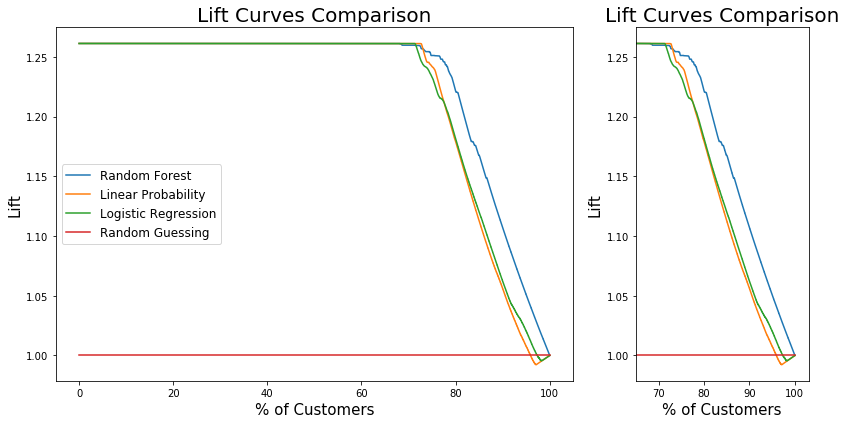

In [61]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
plot_lift_curves(x,
                 [lift_rf,lift_lp,lift_lr],
                 ['Random Forest','Linear Probability','Logistic Regression'])
ax1 = plt.subplot(gs[1])
plot_lift_curves(x,
                 [lift_rf,lift_lp,lift_lr],
                 ['Random Forest','Linear Probability','Logistic Regression'],
                 x_range=(65,103),
                 legend='off')

plt.tight_layout()
plt.show()